In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('movie.csv')

In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['label'].value_counts()

In [ ]:
# create a template function to calculate amount of words in each string record
def count_words(text):
    return len(text.split())

In [ ]:
# apply template function to text feature of the dataframe
df['words_count'] = df['text'].apply(count_words)

In [ ]:
# load a list of stop words to remove from the string
with open('english.txt', 'r') as stopwordsfile:
  stopwords = stopwordsfile.readlines()

In [ ]:
stopwords

In [ ]:
# strip newline characteurs from stopwords in an array
stopwords = list(map(lambda x: x.strip(), stopwords))

In [ ]:
# template function to remove stopwords from text records
import re
def remove_stopwords(text):
  pattern = r'\b(?:{})\b'.format('|'.join(stopwords))
  return re.sub(pattern, '', text, flags=re.IGNORECASE)

In [ ]:
# create a version of each text with no stop words included
df['text_no_stop_words'] = df['text'].apply(remove_stopwords)

In [ ]:
# visualise frequent words using word cloud visualisation
from wordcloud import WordCloud

#rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['text_no_stop_words']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#object of WordNetLemmatizer
lm = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = item.replace('br', '')
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


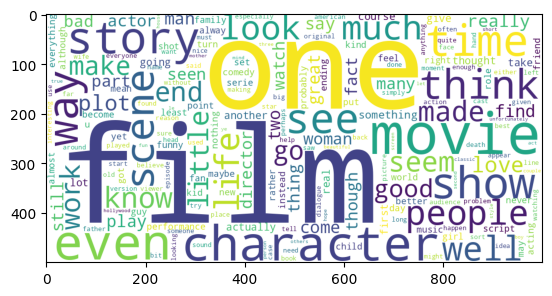

In [ ]:
# visualise frequent words using word cloud visualisation
from wordcloud import WordCloud

word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
corpus = [item.replace('br', '') for item in corpus]

In [ ]:
corpus

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('movie.csv')

#object of WordNetLemmatizer
lm = WordNetLemmatizer()

# download required nltk packages
nltk.download('stopwords')
nltk.download('wordnet')


# create a template function to calculate amount of words in each string record
def count_words(text):
    return len(text.split())

# template function to remove stopwords from text records
def remove_stopwords(text):
  pattern = r'\b(?:{})\b'.format('|'.join(stopwords_))
  return re.sub(pattern, '', text.lower(), flags=re.IGNORECASE)


# template function to transform text using nltk package
def text_transformation(item):

    new_item = item.replace('br', '')
    new_item = re.sub('[^a-zA-Z]',' ',str(item))
    new_item = new_item.lower()
    new_item = new_item.split()
    words = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]

    return ' '.join(str(word) for word in words)

# apply template function to text feature of the dataframe
df['words_count'] = df['text'].apply(count_words)

# load a list of stop words to remove from the string
with open('english.txt', 'r') as stopwordsfile:
  stopwords_ = stopwordsfile.readlines()

# strip newline characteurs from stopwords in an array
stopwords_ = list(map(lambda x: x.strip(), stopwords_))

# create a version of each text with no stop words using nltk
df['text_no_stop_words_nltk'] = df['text'].apply(text_transformation)

# create a version of each text with no stop words included in manual approach
df['text_no_stop_words_manual'] = df['text'].apply(remove_stopwords)

df.to_csv('movie_desc_transformed.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_transformed = pd.read_csv('movie_desc_transformed.csv')

df_transformed.head()

,Unnamed: 0,text,label,words_count,text_no_stop_words_nltk,text_no_stop_words_manual
0,0,I grew up (b. 1965) watching and loving the Th...,0,151,grew b watching loving thunderbird mate school...,grew (. 1965) watching loving thunderbirds...
1,1,"When I put this movie in my DVD player, and sa...",0,326,put movie dvd player sat coke chip expectation...,"movie dvd player, sat coke chips, ..."
2,2,Why do people who do not know what a particula...,0,184,people know particular time past like feel nee...,people time feel define ti...
3,3,Even though I have great interest in Biblical ...,0,69,even though great interest biblical movie bore...,"biblical movies, bored death minute..."
4,4,Im a die hard Dads Army fan and nothing will e...,1,178,im die hard dad army fan nothing ever change g...,die hard dads army fan change . tape...


In [ ]:
df_transformed

,Unnamed: 0,text,label,words_count,text_no_stop_words_nltk,text_no_stop_words_manual
0,0,I grew up (b. 1965) watching and loving the Th...,0,151,grew b watching loving thunderbird mate school...,grew (. 1965) watching loving thunderbirds...
1,1,"When I put this movie in my DVD player, and sa...",0,326,put movie dvd player sat coke chip expectation...,"movie dvd player, sat coke chips, ..."
2,2,Why do people who do not know what a particula...,0,184,people know particular time past like feel nee...,people time feel define ti...
3,3,Even though I have great interest in Biblical ...,0,69,even though great interest biblical movie bore...,"biblical movies, bored death minute..."
4,4,Im a die hard Dads Army fan and nothing will e...,1,178,im die hard dad army fan nothing ever change g...,die hard dads army fan change . tape...
...,...,...,...,...,...,...
39995,39995,"""Western Union"" is something of a forgotten cl...",1,541,western union something forgotten classic west...,"""western union"" forgotten classic western!..."
39996,39996,This movie is an incredible piece of work. It ...,1,50,movie incredible piece work explores every noo...,movie incredible piece . explores nook ...
39997,39997,My wife and I watched this movie because we pl...,0,168,wife watched movie plan visit sicily stromboli...,wife watched movie plan visit sicily s...
39998,39998,"When I first watched Flatliners, I was amazed....",1,168,first watched flatliners amazed necessary feat...,"watched flatliners, amazed. features..."
